Dataset Preview:
   Unnamed: 0                       On                      Off  Reads  \
0           0  GGGTGGGGGGAGTTTGCTCCNGG  GAGTGGGCAGAATTCCCTCCAGG    0.0   
1           1  GGGTGGGGGGAGTTTGCTCCNGG  GGGAGGGGGGAGCTTCTGCATGG    0.0   
2           2  GGGTGGGGGGAGTTTGCTCCNGG  AGGAGAGAGGAGTCTGTTCCCGG    0.0   
3           3  GGGTGGGGGGAGTTTGCTCCNGG  GCCTGAGTGGAGTTTGGTCAAGG    0.0   
4           4  GGGTGGGGGGAGTTTGCTCCNGG  GGCCGGGGGAAGGGTGCTCCGGG    0.0   

   Active  Guide_Length  On_GC_Content  Off_GC_Content  Levenshtein_Distance  
0       0            23      69.565217       60.869565                     7  
1       0            23      69.565217       69.565217                     6  
2       0            23      69.565217       60.869565                     7  
3       0            23      69.565217       56.521739                     7  
4       0            23      69.565217       82.608696                     6  

Summary Statistics:
          Unnamed: 0          Reads        

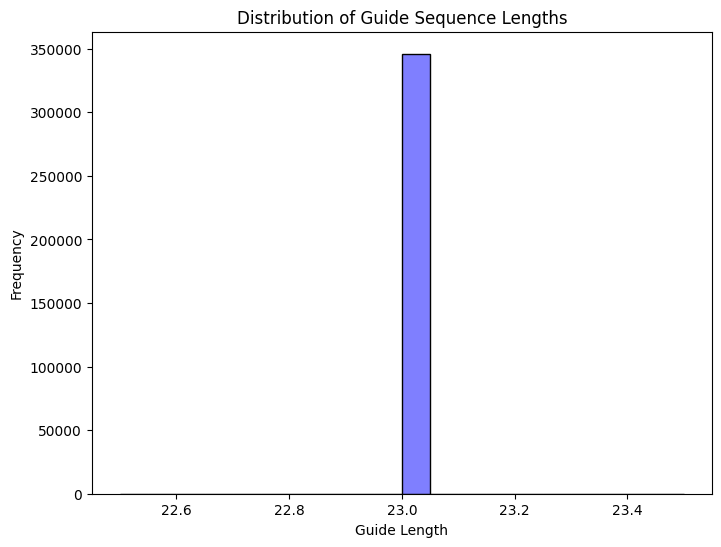

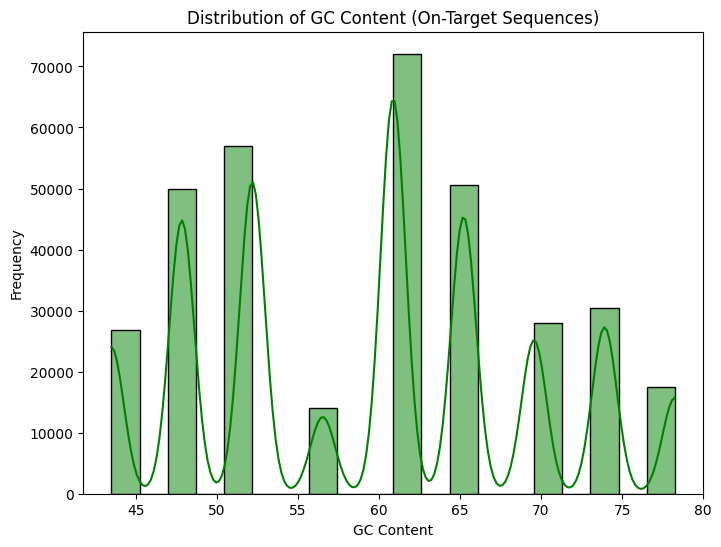

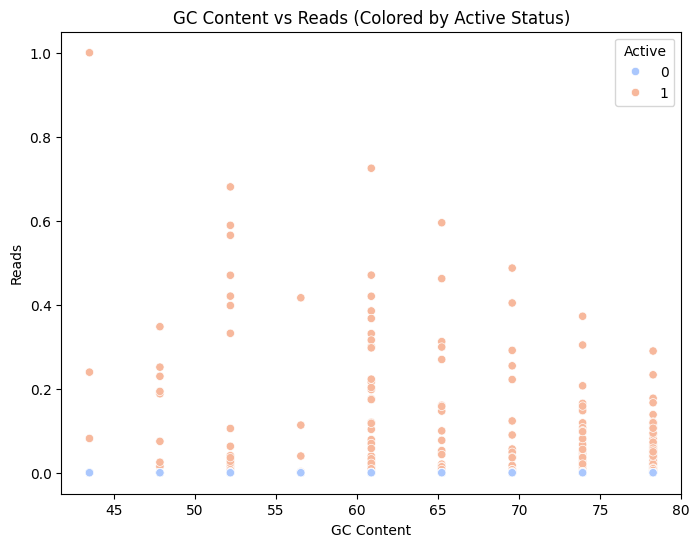

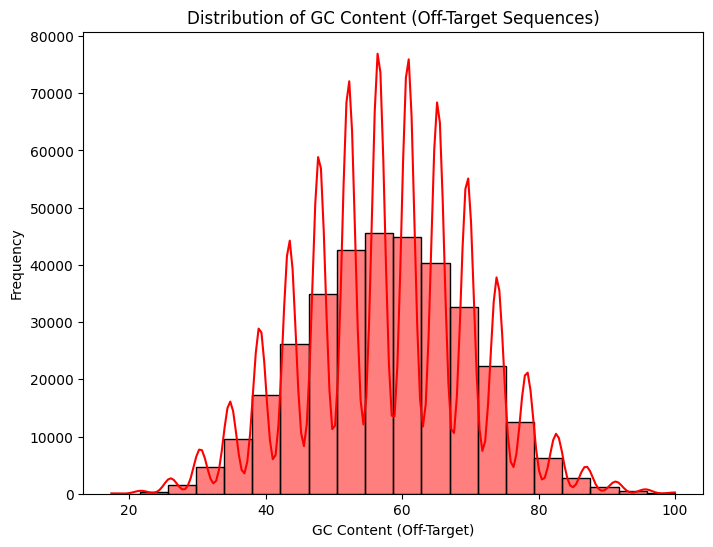

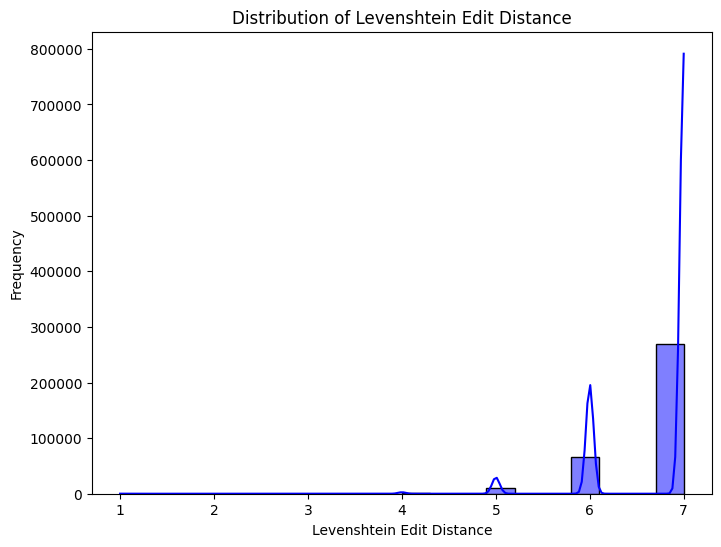

C:\Users\adity\AppData\Local\Temp\ipykernel_29484\1555561736.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Active', palette='pastel')


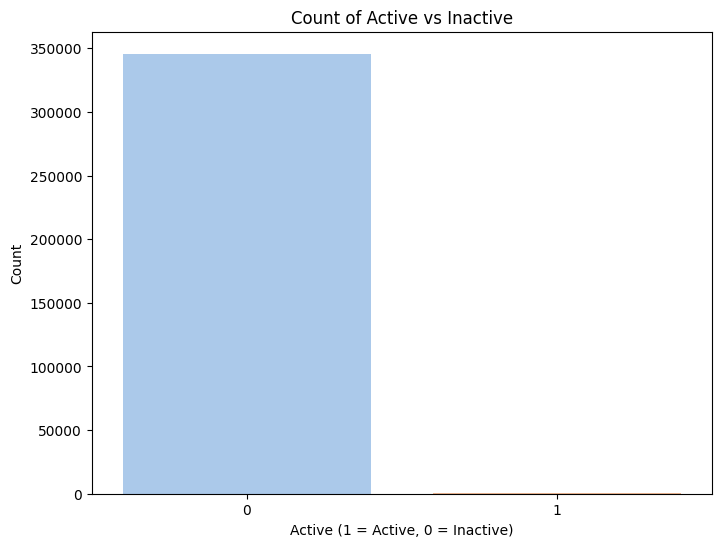

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from pathlib import Path

os.getcwd()
# Add the 'src' directory to the Python path

sys.path.append(r'C:\Users\adity\Projects\CRISPR-ML\src')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from feature_eng import extract_features
from data_processing import process_data

# Load processed dataset

raw_input_path = r'C:\Users\adity\Projects\CRISPR-ML\data\raw\guideseq.csv'
processed_output_path = r'C:\Users\adity\Projects\CRISPR-ML\data\processed\processed_guideseq.csv'
# process_data(raw_input_path, processed_output_path)

features_input_path = r'C:\Users\adity\Projects\CRISPR-ML\data\processed\processed_guideseq.csv'
features_output_path = r'C:\Users\adity\Projects\CRISPR-ML\data\processed\features_guideseq.csv'
# extract_features(features_input_path, features_output_path)
data = pd.read_csv(features_output_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check basic statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Distribution of guide sequence length
plt.figure(figsize=(8, 6))
sns.histplot(data['Guide_Length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Guide Sequence Lengths')
plt.xlabel('Guide Length')
plt.ylabel('Frequency')
plt.show()

# Distribution of GC content for on-target sequences
plt.figure(figsize=(8, 6))
sns.histplot(data['On_GC_Content'], bins=20, kde=True, color='green')
plt.title('Distribution of GC Content (On-Target Sequences)')
plt.xlabel('GC Content')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: GC content vs Reads
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='On_GC_Content', y='Reads', hue='Active', palette='coolwarm')
plt.title('GC Content vs Reads (Colored by Active Status)')
plt.xlabel('GC Content')
plt.ylabel('Reads')
plt.legend(title='Active')
plt.show()

# Distribution of GC content for off-target sequences (if present)
if 'Off_GC_Content' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Off_GC_Content'], bins=20, kde=True, color='red')
    plt.title('Distribution of GC Content (Off-Target Sequences)')
    plt.xlabel('GC Content (Off-Target)')
    plt.ylabel('Frequency')
    plt.show()

# Distribution of Levenshtein Edit Distance
if 'Levenshtein_Distance' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Levenshtein_Distance'], bins=20, kde=True, color='blue')
    plt.title('Distribution of Levenshtein Edit Distance')
    plt.xlabel('Levenshtein Edit Distance')
    plt.ylabel('Frequency')
    plt.show()

# Count plot for Active column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Active', palette='pastel')
plt.title('Count of Active vs Inactive')
plt.xlabel('Active (1 = Active, 0 = Inactive)')
plt.ylabel('Count')
plt.show()
